In [1]:
# Mengimpor library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Mengimpor data test
datatest = pd.read_excel('kendaraan_test.xlsx')
datatest

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,22,1,52,0,1-2 Tahun,Pernah,32895,124,71,1
1,Pria,54,1,52,0,1-2 Tahun,Pernah,43388,124,198,0
2,Wanita,24,1,52,0,1-2 Tahun,Pernah,45032,124,171,0
3,Wanita,78,1,52,0,> 2 Tahun,Pernah,42825,26,208,1
4,Wanita,45,1,52,0,1-2 Tahun,Pernah,2630,26,228,0
...,...,...,...,...,...,...,...,...,...,...,...
47634,Pria,41,1,0,0,1-2 Tahun,Pernah,2630,78,20,0
47635,Pria,39,1,0,0,1-2 Tahun,Pernah,2630,124,200,0
47636,Pria,33,1,0,1,< 1 Tahun,Tidak,2630,152,152,0
47637,Wanita,71,1,0,0,1-2 Tahun,Pernah,2630,25,226,0


In [3]:
#import data train
datatrain = pd.read_excel('kendaraan_train.xlsx')
datatrain

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,< 1 Tahun,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,285828,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,285829,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,285830,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


In [4]:
# Merge data train and data test
feature = ['Jenis_Kelamin', 'Umur', 'SIM', 'Kode_Daerah', 'Sudah_Asuransi', 'Umur_Kendaraan', 'Kendaraan_Rusak', 'Premi', 'Kanal_Penjualan', 'Lama_Berlangganan', 'Tertarik']
dataset = datatrain[feature].append(datatest, ignore_index=True) 
dataset

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,< 1 Tahun,28029.0,152.0,97.0,0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...
333465,Pria,41.0,1.0,0.0,0.0,1-2 Tahun,Pernah,2630.0,78.0,20.0,0
333466,Pria,39.0,1.0,0.0,0.0,1-2 Tahun,Pernah,2630.0,124.0,200.0,0
333467,Pria,33.0,1.0,0.0,1.0,< 1 Tahun,Tidak,2630.0,152.0,152.0,0
333468,Wanita,71.0,1.0,0.0,0.0,1-2 Tahun,Pernah,2630.0,25.0,226.0,0


In [5]:
#menghitung data nan/null dari tiap kolom (dalam %)
dataset.isnull().sum().sort_values(ascending=False)/len(dataset)*100

Premi                4.368909
Jenis_Kelamin        4.330225
SIM                  4.319429
Kode_Daerah          4.290041
Kanal_Penjualan      4.287942
Umur_Kendaraan       4.280745
Sudah_Asuransi       4.266951
Umur                 4.262452
Kendaraan_Rusak      4.254656
Lama_Berlangganan    4.195880
Tertarik             0.000000
dtype: float64

In [6]:
#drop data dengan nilai nan/null
dataset = dataset.dropna()
len(dataset)

218707

In [7]:
#drop kolom yang tidak dipakai
dataset = dataset.drop(columns=['Tertarik'])
dataset = dataset.drop(columns=['Kanal_Penjualan'])
dataset

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Lama_Berlangganan
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,< 1 Tahun,28029.0,97.0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,158.0
3,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,63.0
5,Pria,21.0,1.0,35.0,1.0,< 1 Tahun,Tidak,22735.0,171.0
8,Wanita,20.0,1.0,8.0,1.0,< 1 Tahun,Tidak,30786.0,31.0
...,...,...,...,...,...,...,...,...,...
333465,Pria,41.0,1.0,0.0,0.0,1-2 Tahun,Pernah,2630.0,20.0
333466,Pria,39.0,1.0,0.0,0.0,1-2 Tahun,Pernah,2630.0,200.0
333467,Pria,33.0,1.0,0.0,1.0,< 1 Tahun,Tidak,2630.0,152.0
333468,Wanita,71.0,1.0,0.0,0.0,1-2 Tahun,Pernah,2630.0,226.0


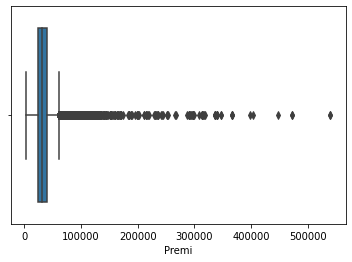

In [8]:
# Checking outliers
sns.boxplot(x = 'Premi', data = dataset)

In [10]:
# menentukan nilai upperbound dan lower bound
# Removing Outliers
q1 = np.percentile(dataset.Premi,25)
q3 = np.percentile(dataset.Premi,75)
iqr = q3 - q1
lower_bound = q1 - ( iqr * 1.5)
upper_bound = q3 + ( iqr * 1.5)
datanew = dataset[(dataset['Premi']>lower_bound) & (dataset['Premi']<upper_bound)]
print('Lower bound: ', lower_bound)
print('upper bound: ', upper_bound)

Lower bound:  1894.75
upper bound:  61836.75


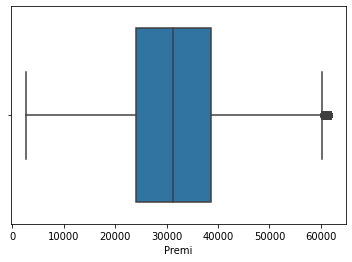

In [11]:
# Checking outliers
sns.boxplot(x = 'Premi', data = datanew)

In [12]:
from sklearn.preprocessing import LabelEncoder

#labeling untuk data categorical ordinal
le_Umur_Kendaraan = LabelEncoder()
datanew['Umur_Kendaraan'] = le_Umur_Kendaraan.fit_transform(datanew['Umur_Kendaraan'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [13]:
#labeling untuk data categorical nominal

dummies = pd.get_dummies(datanew['Jenis_Kelamin'], prefix='jenkel')
datanew = pd.concat([datanew, dummies], axis=1)
datanew = datanew.drop(['Jenis_Kelamin'], axis = 1)

dummies = pd.get_dummies(datanew['Kode_Daerah'], prefix='daerah')
datanew = pd.concat([datanew, dummies], axis=1)
datanew = datanew.drop(['Kode_Daerah'], axis = 1)

dummies = pd.get_dummies(datanew['SIM'], prefix='sim')
datanew = pd.concat([datanew, dummies], axis=1)
datanew = datanew.drop(['SIM'], axis = 1)

dummies = pd.get_dummies(datanew['Sudah_Asuransi'], prefix='asuransi')
datanew = pd.concat([datanew, dummies], axis=1)
datanew = datanew.drop(['Sudah_Asuransi'], axis = 1)

dummies = pd.get_dummies(datanew['Kendaraan_Rusak'], prefix='kendaraan_rusak')
datanew = pd.concat([datanew, dummies], axis=1)
datanew = datanew.drop(['Kendaraan_Rusak'], axis = 1)


In [14]:
datanew

,Umur,Umur_Kendaraan,Premi,Lama_Berlangganan,jenkel_Pria,jenkel_Wanita,daerah_0.0,daerah_1.0,daerah_2.0,daerah_3.0,daerah_4.0,daerah_5.0,daerah_6.0,daerah_7.0,daerah_8.0,daerah_9.0,daerah_10.0,daerah_11.0,daerah_12.0,daerah_13.0,daerah_14.0,daerah_15.0,daerah_16.0,daerah_17.0,daerah_18.0,daerah_19.0,daerah_20.0,daerah_21.0,daerah_22.0,daerah_23.0,daerah_24.0,daerah_25.0,daerah_26.0,daerah_27.0,daerah_28.0,daerah_29.0,daerah_30.0,daerah_31.0,daerah_32.0,daerah_33.0,daerah_34.0,daerah_35.0,daerah_36.0,daerah_37.0,daerah_38.0,daerah_39.0,daerah_40.0,daerah_41.0,daerah_42.0,daerah_43.0,daerah_44.0,daerah_45.0,daerah_46.0,daerah_47.0,daerah_48.0,daerah_49.0,daerah_50.0,daerah_51.0,daerah_52.0,sim_0.0,sim_1.0,asuransi_0.0,asuransi_1.0,kendaraan_rusak_< 1 Tahun,kendaraan_rusak_Pernah,kendaraan_rusak_Tidak
0,30.0,1,28029.0,97.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
1,48.0,2,25800.0,158.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0
3,58.0,0,2630.0,63.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1
5,21.0,1,22735.0,171.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
8,20.0,1,30786.0,31.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333465,41.0,0,2630.0,20.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0
333466,39.0,0,2630.0,200.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0
333467,33.0,1,2630.0,152.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
333468,71.0,0,2630.0,226.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0


In [15]:
from sklearn.preprocessing import MinMaxScaler

#scaling data dengan minmax scaler agar menjadi di rentang yang sama[0,1]
scaler = MinMaxScaler()
datanew['Premi'] = scaler.fit_transform(datanew[['Premi']])
datanew['Umur'] = scaler.fit_transform(datanew[['Umur']])
datanew['Lama_Berlangganan'] = scaler.fit_transform(datanew[['Lama_Berlangganan']])
datanew

,Umur,Umur_Kendaraan,Premi,Lama_Berlangganan,jenkel_Pria,jenkel_Wanita,daerah_0.0,daerah_1.0,daerah_2.0,daerah_3.0,daerah_4.0,daerah_5.0,daerah_6.0,daerah_7.0,daerah_8.0,daerah_9.0,daerah_10.0,daerah_11.0,daerah_12.0,daerah_13.0,daerah_14.0,daerah_15.0,daerah_16.0,daerah_17.0,daerah_18.0,daerah_19.0,daerah_20.0,daerah_21.0,daerah_22.0,daerah_23.0,daerah_24.0,daerah_25.0,daerah_26.0,daerah_27.0,daerah_28.0,daerah_29.0,daerah_30.0,daerah_31.0,daerah_32.0,daerah_33.0,daerah_34.0,daerah_35.0,daerah_36.0,daerah_37.0,daerah_38.0,daerah_39.0,daerah_40.0,daerah_41.0,daerah_42.0,daerah_43.0,daerah_44.0,daerah_45.0,daerah_46.0,daerah_47.0,daerah_48.0,daerah_49.0,daerah_50.0,daerah_51.0,daerah_52.0,sim_0.0,sim_1.0,asuransi_0.0,asuransi_1.0,kendaraan_rusak_< 1 Tahun,kendaraan_rusak_Pernah,kendaraan_rusak_Tidak
0,0.153846,1,0.429030,0.301038,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
1,0.430769,2,0.391379,0.512111,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0
3,0.584615,0,0.000000,0.183391,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1
5,0.015385,1,0.339606,0.557093,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
8,0.000000,1,0.475600,0.072664,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333465,0.323077,0,0.000000,0.034602,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0
333466,0.292308,0,0.000000,0.657439,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0
333467,0.200000,1,0.000000,0.491349,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
333468,0.784615,0,0.000000,0.747405,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0


In [16]:
#model kmeans dengan bentuk class
class Kmeans:
  def __init__(self, k, max_iter):
    self.k = k
    self.max_iter = max_iter
    self.centroid = []

  #perhitungan jarak dengan euclidean
  def euclidean(self, x1, x2):
    distance = np.sqrt(((x2-x1)**2).sum(axis=0))
    return distance

  def fit(self,data):

    #label cluster awal diset default menjadi -1 terlebih dahulu 
    labels = [-1]*len(data)

    #pemilihan cluster awal secara random sebanyak k
    self.centroid = data.sample(self.k)
    self.centroid = self.centroid.to_numpy()

    data = data.to_numpy()

    for i in range(self.max_iter):
      #nilai inertia untuk menghitung wcss yang berguna untuk elbow method
      self.inertia = 0
      #clusters untuk pengumpulan data berdasarkan cluster, digunakan untuk menghitung mean pada centroid nanti
      clusters = [[] for i in range(self.k)]

      for x in range(len(data)):
        
        #menghitung jarak tiap data ke tiap centroid
        distance = []
        for indeks in range(len(self.centroid)):
          distance.append(self.euclidean(data[x], self.centroid[indeks]))
        #memasukkan data ke cluster terdekat
        label = distance.index(min(distance))
        clusters[label].append(data[x])
        labels[x] = label

        self.inertia += (min(distance))**2

      #pergantian tiap centroid dengan mean tiap cluster
      temp = np.copy(self.centroid)
      for indeks in range(self.k):
        self.centroid[indeks] = np.mean(clusters[indeks], axis=0)

      #pengecekan kondisi berhenti kmeans, apakah centroid sama dengan sebelumnya atau tidak
      condition = temp == self.centroid
      if condition.all():
        break
    
    #function fit mengembalikan label cluster tiap data
    return labels

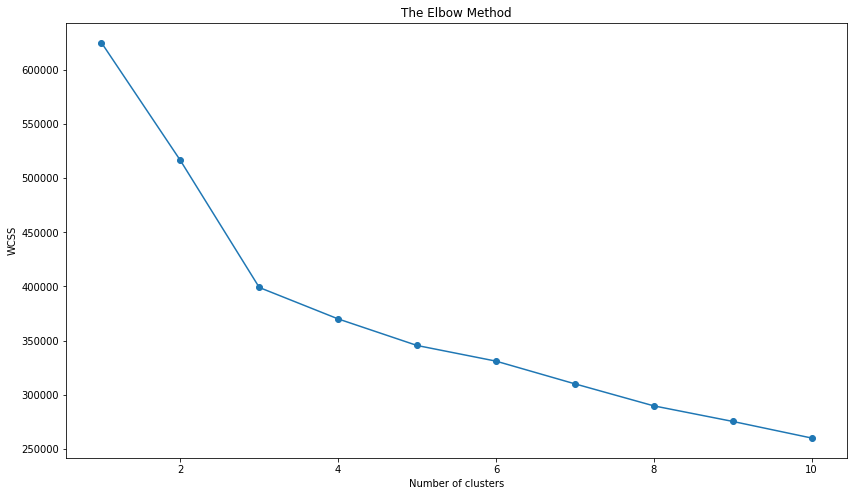

In [17]:
#menjalankan elbow method
wcss = []
for i in range(1, 11):
  kmeans = Kmeans(i, 100)
  kmeans.fit(datanew)
  wcss.append(kmeans.inertia)

plt.figure(figsize=(14,8))
plt.plot(range(1, 11), wcss)
plt.scatter(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [18]:
#percobaan kmeans dengan k=2 dan max_iterasi = 100
model = Kmeans(2, 100)
label = model.fit(datanew)

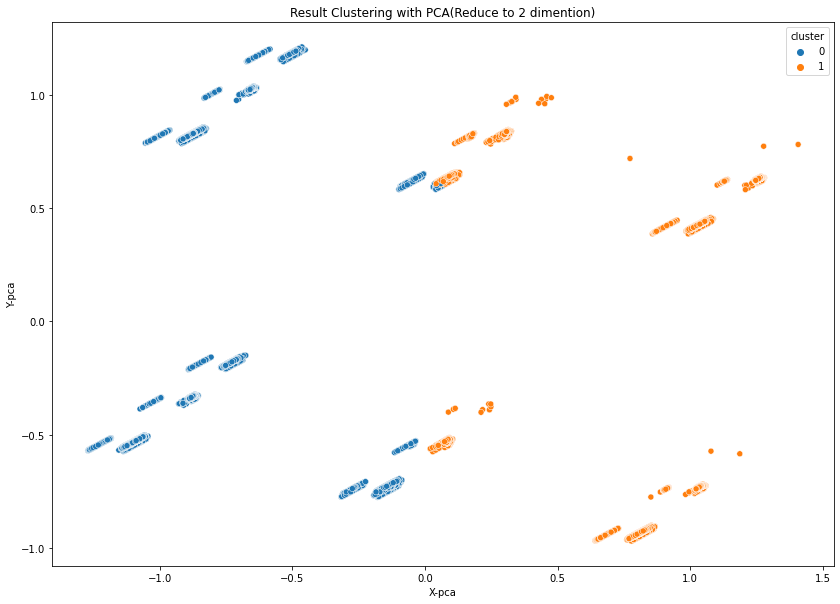

In [19]:
from sklearn.decomposition import PCA
#penggunaan PCA untuk mereduksi semua kolom feature menjadi 2 dimensi agar dapat dilihat persebaran cluster dengan baik
pca = PCA(n_components=2)
pca = pca.fit_transform(datanew)
df = pd.DataFrame()

df['X-pca'] = pca[:,0]
df['Y-pca'] = pca[:,1]
df['cluster'] = label
plt.figure(figsize=(14,10))
sns.scatterplot(data=df, x="X-pca", y="Y-pca", hue="cluster")
plt.title('Result Clustering with PCA(Reduce to 2 dimention)')
plt.show()

In [20]:
#menggabungkan data hasil eksplorasi dengan label clusternya masing-masing
data_cluster = datanew.copy()
data_cluster["Cluster"] = label
data_cluster.head()

,Umur,Umur_Kendaraan,Premi,Lama_Berlangganan,jenkel_Pria,jenkel_Wanita,daerah_0.0,daerah_1.0,daerah_2.0,daerah_3.0,daerah_4.0,daerah_5.0,daerah_6.0,daerah_7.0,daerah_8.0,daerah_9.0,daerah_10.0,daerah_11.0,daerah_12.0,daerah_13.0,daerah_14.0,daerah_15.0,daerah_16.0,daerah_17.0,daerah_18.0,daerah_19.0,daerah_20.0,daerah_21.0,daerah_22.0,daerah_23.0,daerah_24.0,daerah_25.0,daerah_26.0,daerah_27.0,daerah_28.0,daerah_29.0,daerah_30.0,daerah_31.0,daerah_32.0,daerah_33.0,daerah_34.0,daerah_35.0,daerah_36.0,daerah_37.0,daerah_38.0,daerah_39.0,daerah_40.0,daerah_41.0,daerah_42.0,daerah_43.0,daerah_44.0,daerah_45.0,daerah_46.0,daerah_47.0,daerah_48.0,daerah_49.0,daerah_50.0,daerah_51.0,daerah_52.0,sim_0.0,sim_1.0,asuransi_0.0,asuransi_1.0,kendaraan_rusak_< 1 Tahun,kendaraan_rusak_Pernah,kendaraan_rusak_Tidak,Cluster
0,0.153846,1,0.429030,0.301038,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1
1,0.430769,2,0.391379,0.512111,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0
3,0.584615,0,0.000000,0.183391,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,1
5,0.015385,1,0.339606,0.557093,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1
8,0.000000,1,0.475600,0.072664,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1


In [ ]:
#hasil dataframe penggabungan tadi diexport kedalam bentuk file csv
data_cluster.to_csv("data_cluster.csv", index=False)